In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from aicentro.session import Session
sacp_session = Session(verify=False)
from aicentro.framework.framework import BaseFramework as SacpFrm
sacp_framework = SacpFrm(session=sacp_session)

###  <b>데이터 불러오기</b>
---
- 학습 데이터 불러오기

In [2]:
Train_Data = pd.read_csv('TrainData.csv',delimiter=',')

### <b>데이터 전처리</b>
---

In [3]:
Train_Data=Train_Data.drop_duplicates()

In [4]:
Train_Data['Result_v1'].replace({'benign':1,'malicious':-1}, inplace=True)

In [5]:
Train_Data.drop(columns=["url_chinese_present","html_num_tags('applet')"],inplace=True)

In [6]:
Train_Data = Train_Data.dropna(axis=0)

In [7]:
X = Train_Data.iloc[:,0:len(Train_Data.columns)-1].values
y = Train_Data.iloc[:,len(Train_Data.columns)-1].values

### <b> train_test_split을 이용하여, train_x, val_x, train_y, val_y로 데이터 분리</b>
---

- test_size = 0.3
- random_state = 2021

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# train_test_split 사용
train_x, val_x, train_y, val_y = train_test_split(X, y,test_size=0.3,random_state=2021) 

In [10]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((3632, 41), (1557, 41), (3632,), (1557,))

### <b>Confusion Matrix 함수 정의</b>
---

- Confusion Matrix란?
 - Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
 - 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 
 


In [11]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [12]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

- 샘플
##### > confusion = confusion_matrix(test_y, dt_pred)
##### > fig, ax = plt.subplots(figsize=(10,3))
##### > plot_confusion_matrix(ax, confusion, fontsize=30)


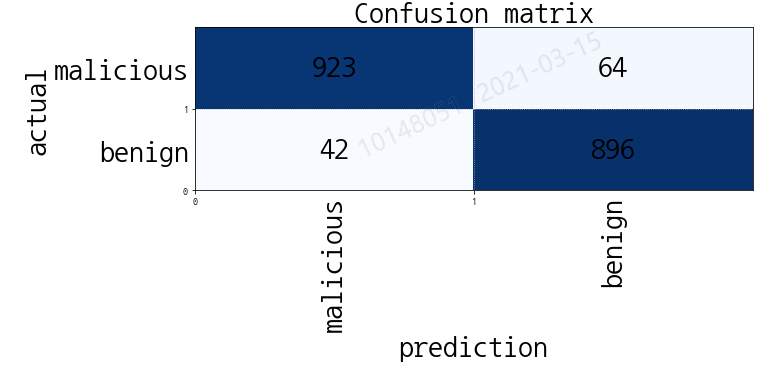

### <b> Q2. DecisonTree 모델을 만들어보자
---
  
* DecisionTree란? <br>
    * 의사결정 규칙을 나무구조로 나타내어 전체 데이터를 소집단으로 분류하거나 예측<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

    * 예) Iris DecisionTree(결정트리)

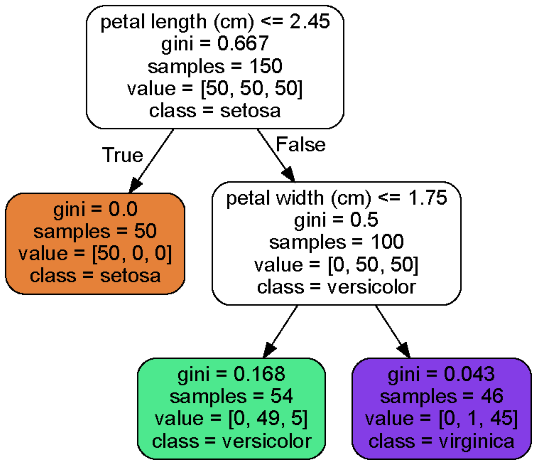<br>
> 출처 : 핸즈온 머신러닝 2판 | 한빛미디어 | 오렐리앙제롱 지음, 박해선 옮김|


* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">min_samples_split</td><td>노드를 분할하기 위한 최소한의 샘플 데이터 수,  default=2</td>
    </tr>
    <tr>
        <td align="center">min_samples_leaf</td><td>말단 노드가 되기 위한 최소한의 샘플 데이터</td>
    </tr>
    <tr>
        <td align="center">max_features</td><td>최적의 분할을 위해 고려할 최대 feature 개수, default = None(데이터 세트의 모든 피처를 사용)</td>
    </tr>
    <tr>
        <td align="center">max_depth</td><td>트리의 최대 깊이, default=None(완벽하게 클래스 값이 결정될 때 까지 계속)</td>
    </tr>
    <tr>
        <td align="center">max_leaf_nodes</td><td>말단 노드의 최대 개수</td>
    </tr>
</table>

In [13]:
# 1. import
from sklearn.tree import DecisionTreeClassifier


In [14]:
# 2.선언
dtc = DecisionTreeClassifier()



In [15]:
# 3. fit()
dtc.fit(train_x,train_y)



DecisionTreeClassifier()

In [16]:
# 3. predict()
dtc_pred = dtc.predict(val_x)


In [17]:
# train 및 val 데이터 정확도 확인 : score()
dtc.score(train_x, train_y), dtc.score(val_x, val_y)


(1.0, 0.9370584457289659)

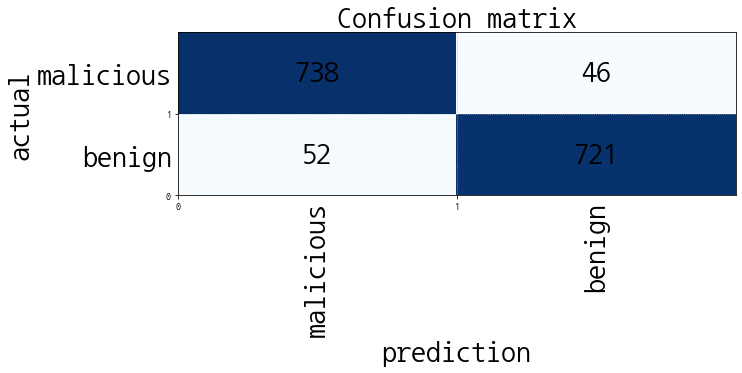

In [18]:
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, dtc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)




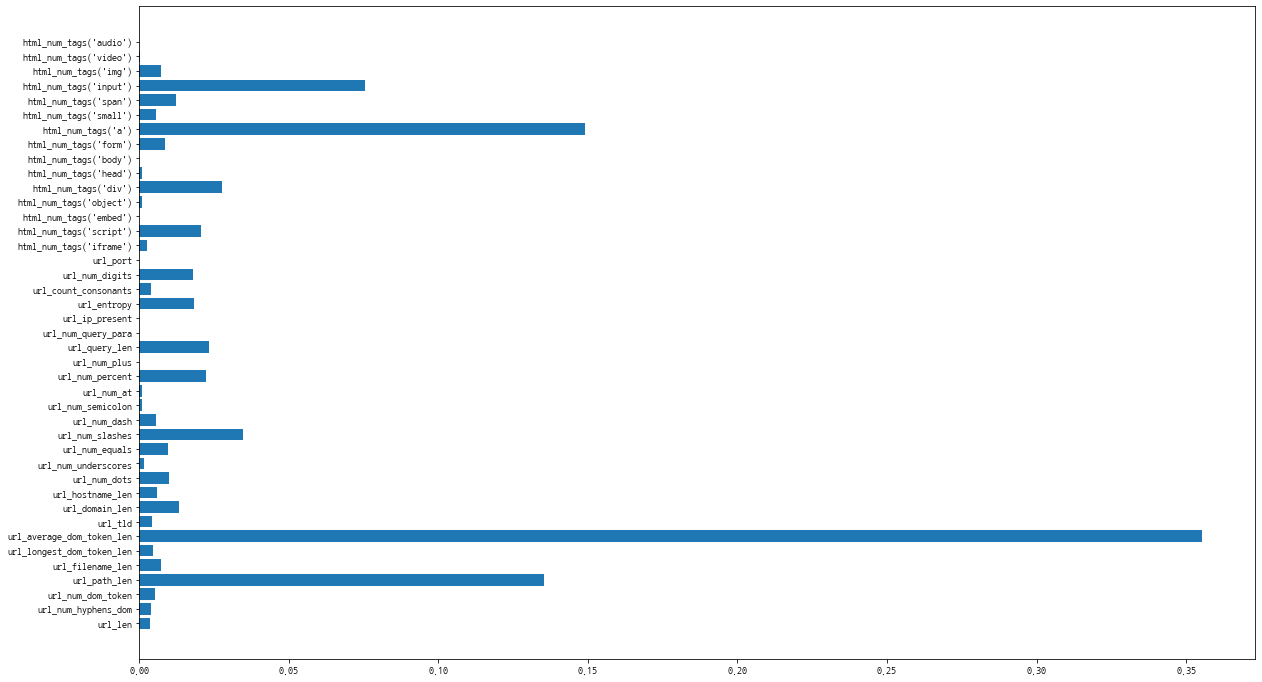

In [19]:
plt.figure(figsize=(20,12))
plt.barh(y=Train_Data.columns[:-1],
        width = dtc.feature_importances_)
plt.show()

---
### <b>앙상블(Ensemble)</b>
* 앙상블(Ensemble)이란? <br>
   * 여러 개의 결정 트리(Decision Tree)를 결합하여 하나의 결정 트리보다 더 좋은 성능을 내는 머신러닝 기법<br>
   * 앙상블 학습법에는 배깅(Bagging), 부스팅(Boosting), 스태킹(Staking) 등이 존재<br><br>
* 배깅(Bagging)이란? <br>
   * Bagging은 Bootstrap(데이터를 만드는 방법) + Aggregation(의사결정방법)의 약자
   * 데이터를 랜덤으로 복원추출(샘플링)하여 합한 결과 기반으로 의사결정하는 방법 <br>
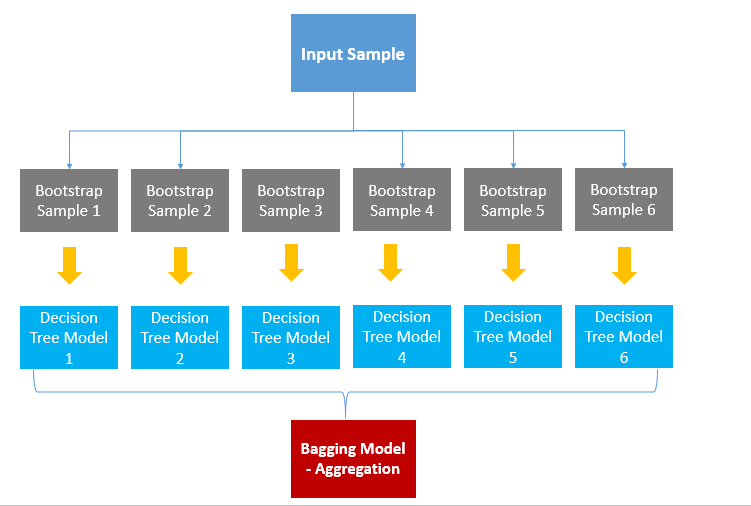
> 출처 : swallow.github.io

* 부스팅(Boosting)이란? <br>
   * 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법
   * 부스팅 방법의 아이디어는 앞의모델을 보완해나가면서 일련의 예측기를 학습시키는 과정<br>
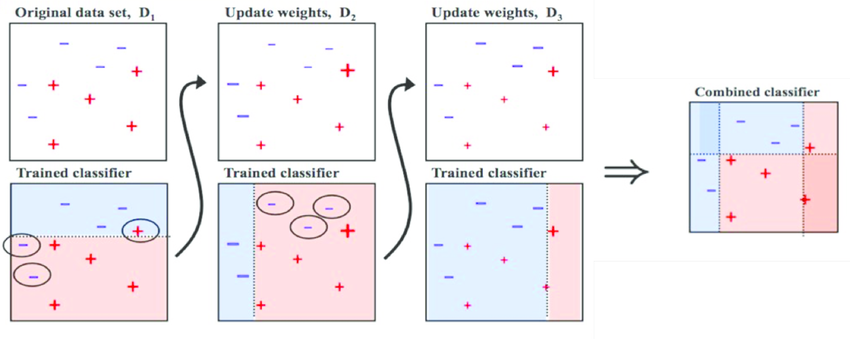
> 출처: Medium (Boosting and Bagging explained with examples)
* 배깅(Bagging)과 부스팅(Boosting) 차이 <br>
   * 배깅(Bagging)은 병렬로 학습하는 반면, 부스팅(Boosting)은 순차적으로 학습<br>
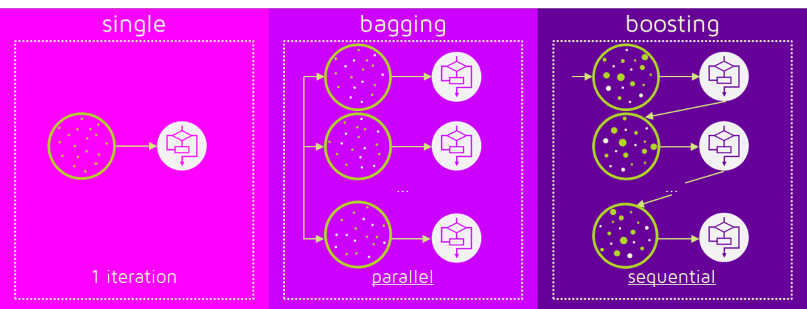
> 출처 : https://assaeunji.github.io/ml/2020-08-06-tree/

## Q3. Random Forest 모델을 만들어보자
---
* RandomForest란? <br>
    * 여러 개의 DecisionTree(결정트리)를 활용한 배깅 방식의 대표적인 알고리즘<br>
    * 배깅과 페이스팅은 훈련 세트에서 무작위로 샘플링하여 여러 개의 예측기를 훈련<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



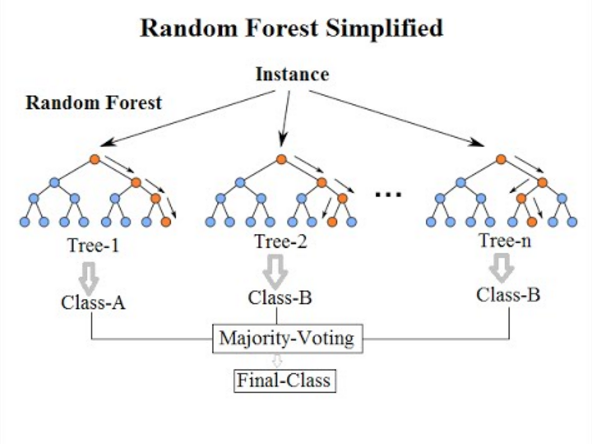
> 출처 : https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">n_estimators</td><td>생성할 의사결정 나무 개수,  default=10</td>
    </tr>
    <tr>
        <td align="center">min_samples_split</td><td>노드를 분할하기 위한 최소한의 샘플 데이터 수, default=2</td>
    </tr>
    <tr>
        <td align="center">min_samples_leaf</td><td>리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수</td>
    </tr>
    <tr>
        <td align="center">max_features</td><td>의사결정 나무 만들시에 사용하는 최대 feature 개수, default=auto</td>
    </tr>
    <tr>
        <td align="center">max_depth</td><td>트리의 최대 깊이, default=None</td>
    </tr>
    <tr>
        <td align="center">max_leaf_nodes</td><td>리프노드의 최대 개수</td>
    </tr>
</table>

In [20]:
# 1. import
from sklearn.ensemble import RandomForestClassifier


In [21]:
# 2.선언
rfc = RandomForestClassifier()



In [22]:
# 3. fit()
rfc.fit(train_x,train_y)



RandomForestClassifier()

In [23]:
# 3. predict()
rfc_pred = rfc.predict(val_x)



In [24]:
# train 및 val 데이터 정확도 확인 :score()
rfc.score(train_x,train_y), rfc.score(val_x, val_y)



(1.0, 0.9678869621066153)

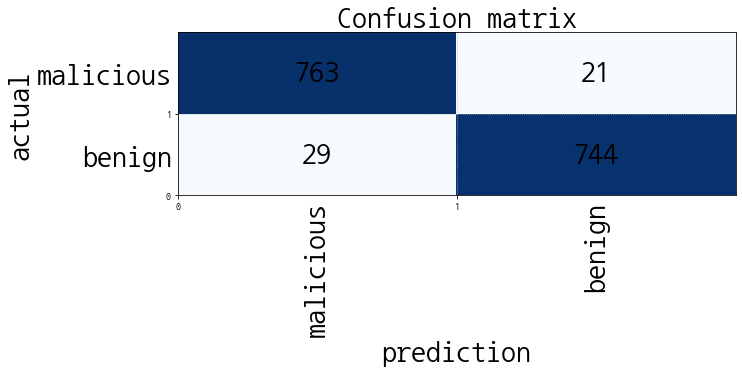

In [25]:
# Confusion Matrix 확인
confusion = confusion_matrix(val_y, rfc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)



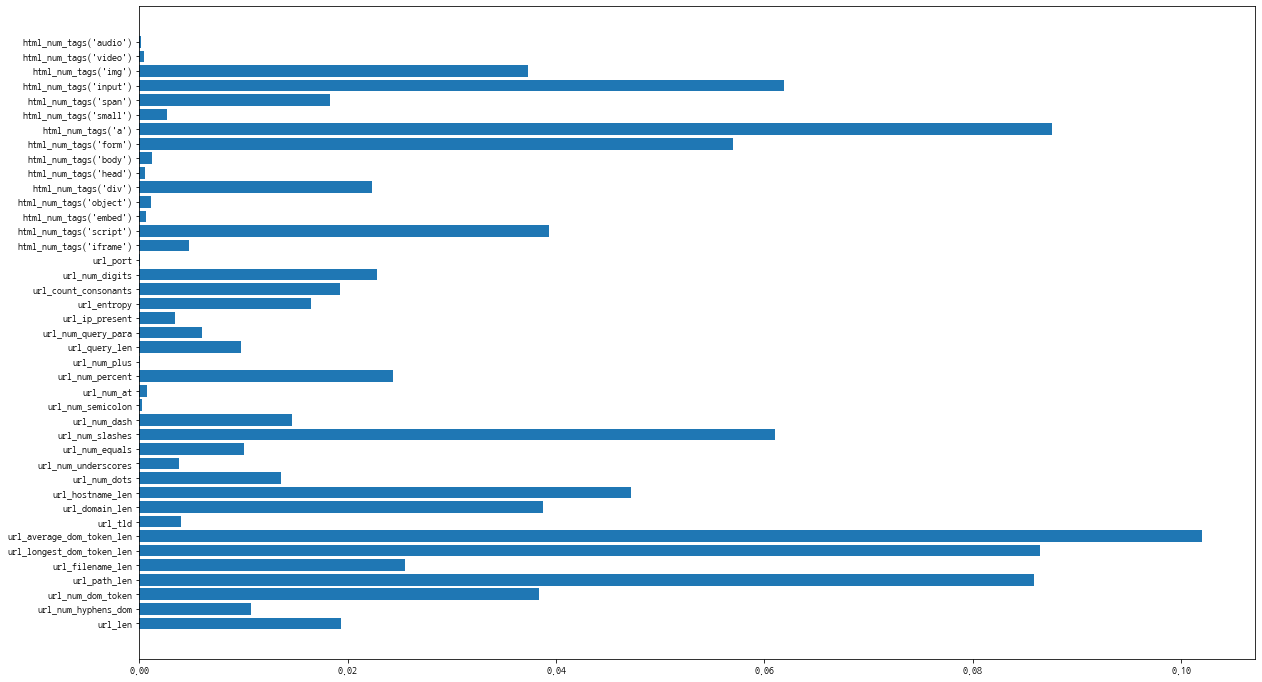

In [26]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=Train_Data.columns[:-1],
        width = rfc.feature_importances_)
plt.show()

### <b> Q4. AdaBoost 모델을 만들어보자
---
* AdaBoost란? <br>
    * 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하며 학습<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html<br>
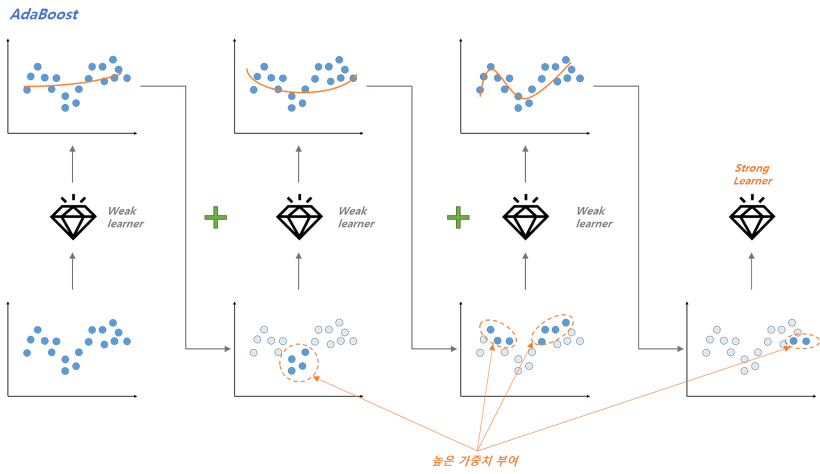<br>
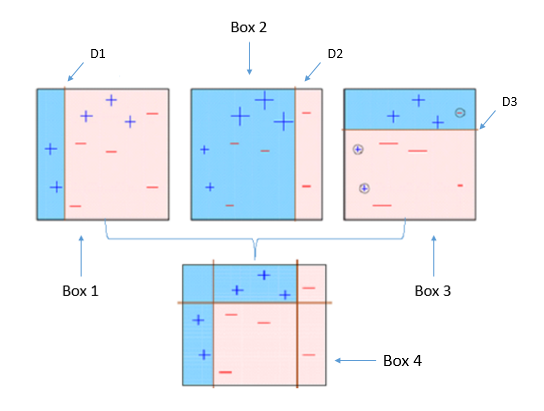<br>
> 출처 : https://devkor.tistory.com/entry/Ensemble-Methods

* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">base_estimators</td><td>학습에 사용하는 알고리즘, default = None(DecisionTreeClassifier 적용)</td>
    </tr>
    <tr>
        <td align="center">n_estimators</td><td>생성할 약한 학습기의 개수를 지정, default = 50</td>
    </tr>
    <tr>
        <td align="center">learning_rate</td><td>학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default = 1</td>
    </tr>
</table>

In [27]:
# 1. import
from sklearn.ensemble import AdaBoostClassifier


In [28]:
# 2.선언
abc = AdaBoostClassifier()


In [29]:
# 3. fit()
abc.fit(train_x,train_y)


AdaBoostClassifier()

In [30]:
# 3. predict()
abc_pred = abc.predict(val_x)


In [31]:
# train 및 val 데이터 정확도 확인 : score()
abc.score(train_x, train_y), abc.score(val_x, val_y)


(0.9622797356828194, 0.9505459216441875)

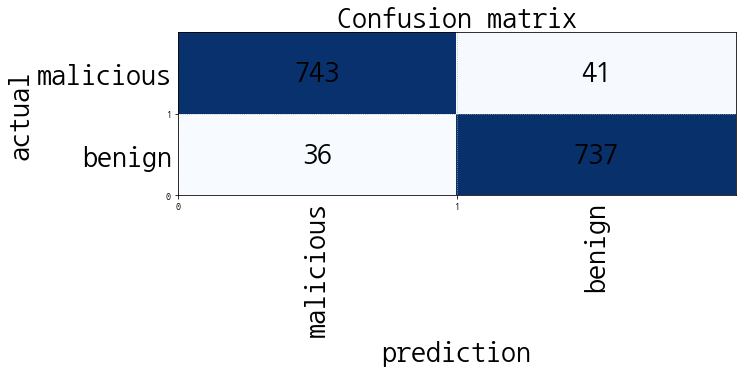

In [32]:
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, abc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)


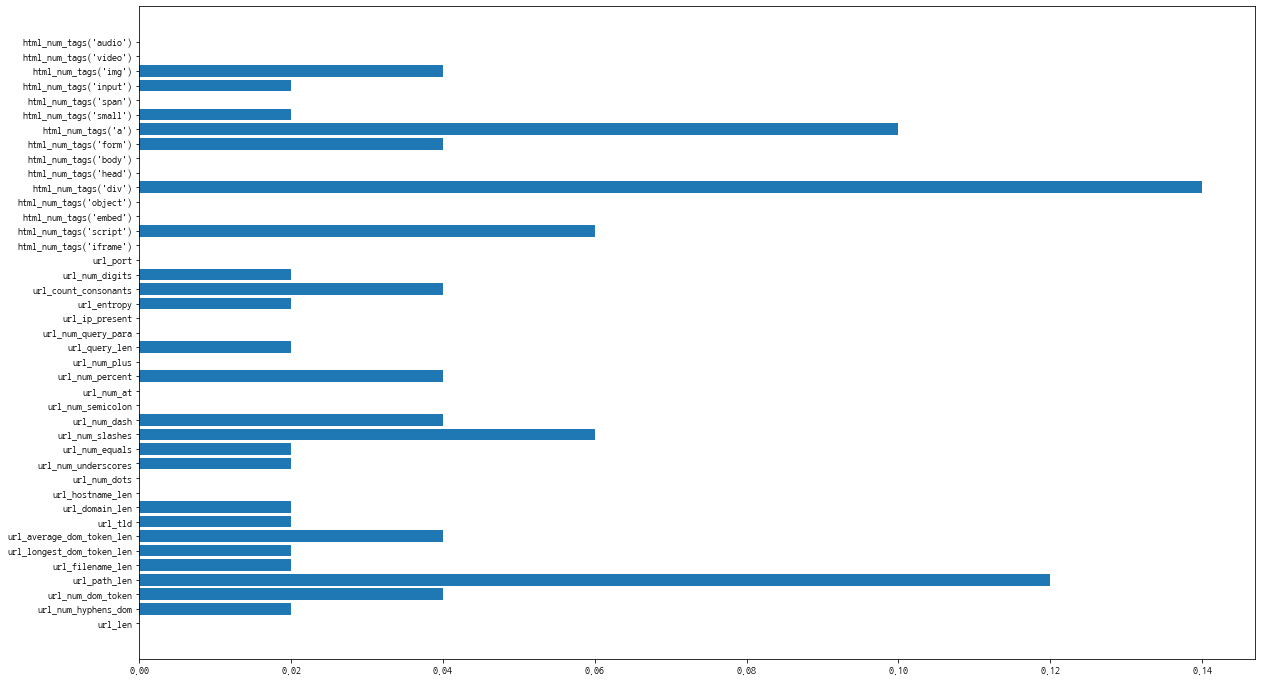

In [33]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=Train_Data.columns[:-1],
        width = abc.feature_importances_)
plt.show()

### <b> Q5. Gradient Boost 모델을 만들어보자
---
* GradientBoost란? <br>
    * 이전 예측기가 만든 잔여오차에 새로운 예측기를 학습<br>
    * Gradient Boost를 발전시킨 모델이 XGBoost, Light GBM, CatBoost<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

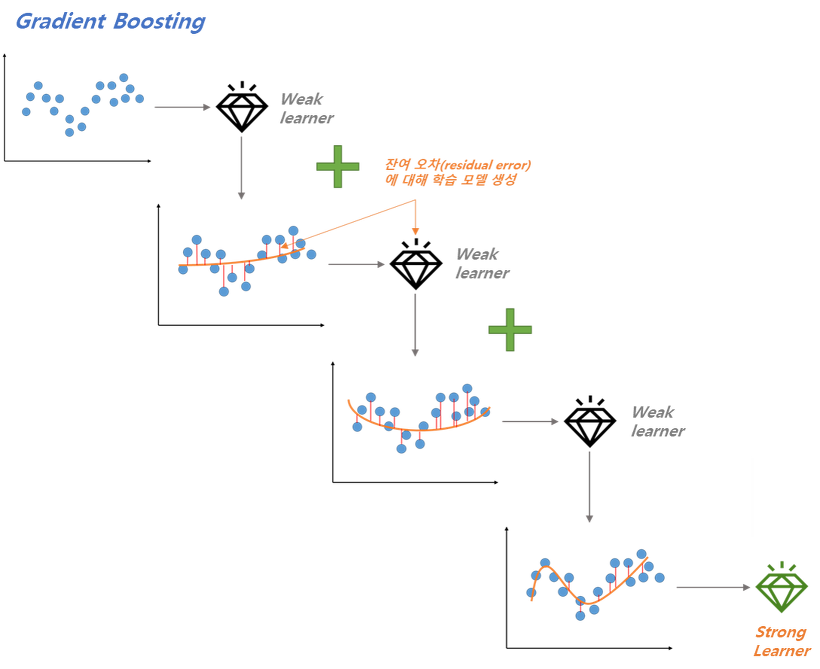
> 출처 : https://devkor.tistory.com/entry/Ensemble-Methods

* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">n_estimators</td><td>생성할 트리의 개수, default = 100</td>
    </tr>
    <tr>
        <td align="center">learning_rate</td><td>학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default = 1</td>
    </tr>
    <tr>
        <td align="center">loss</td><td>경사하강법에서 사용할 손실 함수 지정</td>
    </tr>
</table>

In [34]:
# 1. import
from sklearn.ensemble import GradientBoostingClassifier


In [35]:
# 2.선언
gbc = GradientBoostingClassifier()


In [36]:
# 3. fit()
gbc.fit(train_x,train_y)


GradientBoostingClassifier()

In [37]:
# 3. predict()
gbc_pred = gbc.predict(val_x)


In [38]:
# train 및 val 데이터 정확도 확인 : score()
gbc.score(train_x, train_y), gbc.score(val_x,val_y)


(0.9776982378854625, 0.9595375722543352)

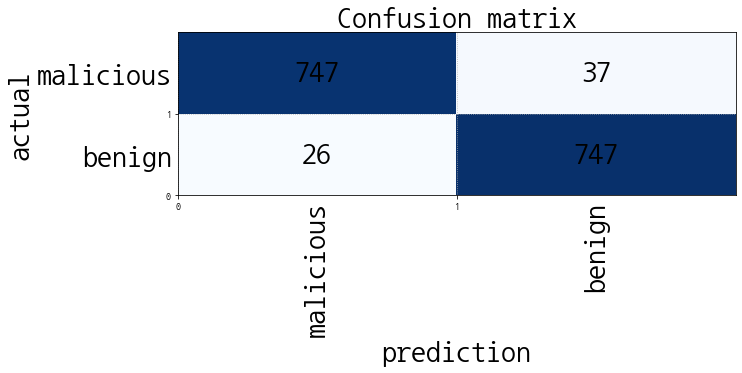

In [39]:
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, gbc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)


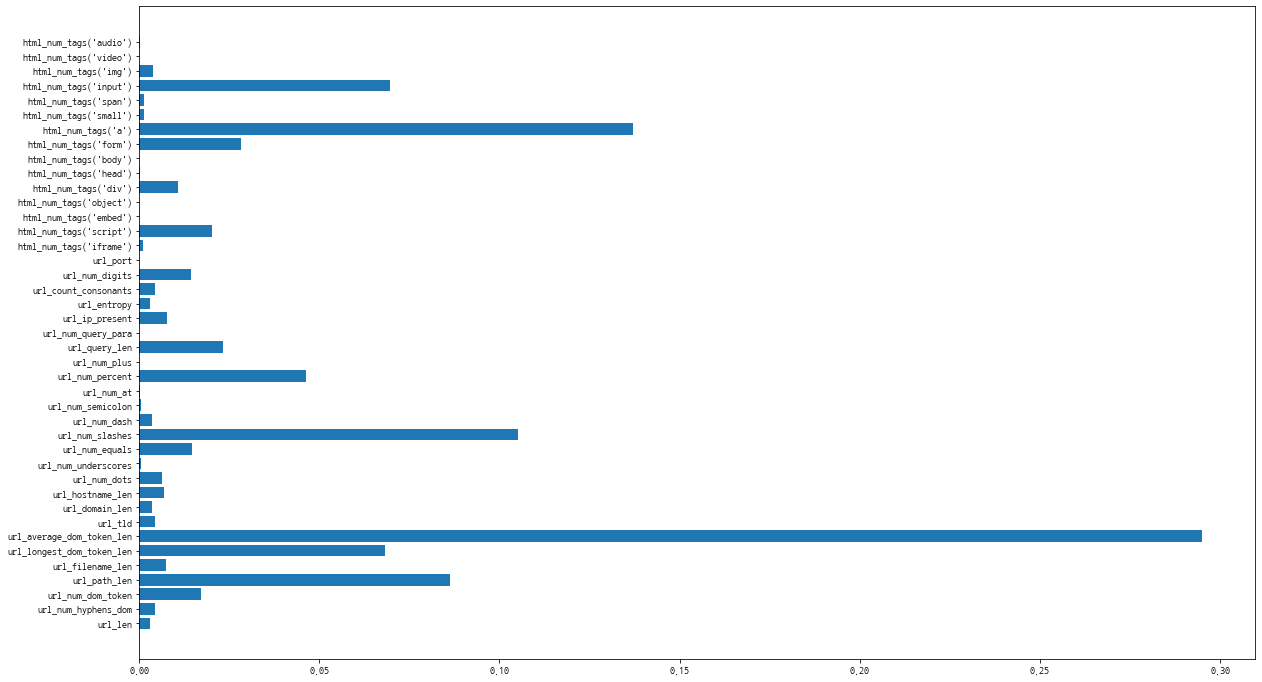

In [40]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=Train_Data.columns[:-1],
        width = gbc.feature_importances_)
plt.show()